## Importing basic libraries

In [1]:
import pandas as pd,numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Here we have used palmos as encoding as some characters where not enocded properly

In [2]:
companies=pd.read_csv('companies.csv',encoding='palmos')
rounds2=pd.read_csv('rounds2.csv',encoding='palmos')

### Looking at the head of the data

In [3]:
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [4]:
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


### As we can see that there are some NaNs in both the datasets, we will deal with them when we encounter questions related to that fields.

# Checkpoint 1
### Solving first question of table 1.1
# Q-1) How many unique companies are present in rounds2?

In [5]:
#Making the column to upper case as Palmos encoding gives preferabbly correct outputs.
rounds2['company_permalink']=rounds2['company_permalink'].str.upper()
rounds2.company_permalink.describe()

count                       114949
unique                       66368
top       /ORGANIZATION/SOLARFLARE
freq                            19
Name: company_permalink, dtype: object

# A-1) 66368
### As describe gave us the unique count of that particular row, so the answer falls out to be as above.

# Q-2) How many unique companies are present in the companies file?

In [6]:
#Repeating the same procedure which is done above for company dataframe.
companies['permalink']=companies['permalink'].str.upper()
companies.permalink.describe()

count                    66368
unique                   66368
top       /ORGANIZATION/YEHIVE
freq                         1
Name: permalink, dtype: object

# A-2) 66368
### In the describe column we see that unique count.

# Q-3) In the companies data frame, which column can be used as the  unique key for each company? Write the name of the column.
### A-3) Permalink (As it is mentioned in description of companies table), In downloads section of this module.

# Q-4)Are there any companies in the rounds2 file which are not  present in companies ? Answer Y/N.

In [7]:
#We will take the values of companies in round2 in a set, and then check if that set exists in companies dataframe.
values=set(rounds2['company_permalink'])
companies['permalink'].isin(values).astype(int).value_counts()

1    66368
Name: permalink, dtype: int64

# A-4) N.
### All the companies present in rounds 2 are present in companies dataframe, we did it by checking value counts. 

# Q-5) Merge the two data frames so that all  variables (columns)  in the companies frame are added to the rounds2 data frame. Name the merged frame master_frame. How many observations are present in master_frame ?

In [8]:
# performing a left join on company_permalink as they can be treated as primary key of both the tables
master_frame=pd.merge(rounds2,companies,how='left',left_on='company_permalink',right_on='permalink')
master_frame.shape

(114949, 16)

# A-5) 114949

# Checkpoint 2
## Table 2.1 begins

In [9]:
#Inspecting data types all the columns
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/ORGANIZATION/-FAME,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/ORGANIZATION/-FAME,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,/ORGANIZATION/-QOUNTER,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/ORGANIZATION/-QOUNTER,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,/ORGANIZATION/-QOUNTER,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/ORGANIZATION/0-6-COM,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,/ORGANIZATION/0-6-COM,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007


In [10]:
master_frame.dtypes

company_permalink           object
funding_round_permalink     object
funding_round_type          object
funding_round_code          object
funded_at                   object
raised_amount_usd          float64
permalink                   object
name                        object
homepage_url                object
category_list               object
status                      object
country_code                object
state_code                  object
region                      object
city                        object
founded_at                  object
dtype: object

### Filtering data as client wants to invest in one out of the four options that are:
    i)   venture
    ii)  angel
    iii) seed
    iv)  private equity

In [11]:
master_frame=master_frame[master_frame.funding_round_type.isin(['seed','angel','venture','private_equity'])]

In [12]:
# Checking number of nulls in raised amt usd column
(master_frame.raised_amount_usd.isnull().sum()/master_frame.shape[0])*100

14.587327987118234

In [13]:
# As 14% is null we need to remove these values because, replacing it with mean values may affect our analysis.
master_frame.dropna(subset=["raised_amount_usd"],inplace=True)
master_frame.shape

(80627, 16)

In [14]:
#Checking the data of amount raised after removing null values.
master_frame.raised_amount_usd.describe()

count    8.062700e+04
mean     9.347995e+06
std      7.562940e+07
min      0.000000e+00
25%      4.000000e+05
50%      2.000000e+06
75%      7.975496e+06
max      1.760000e+10
Name: raised_amount_usd, dtype: float64

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='raised_amount_usd'>

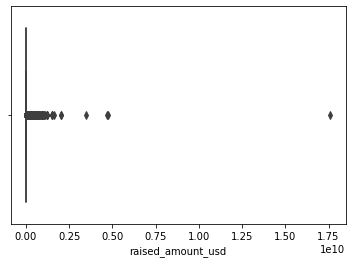

In [15]:
sns.boxplot(master_frame.raised_amount_usd)

# Q-1) Representative funding amount of venture type.

In [16]:
# Taking median as outliers are clearly present which can be seen in above boxplot.
master_frame[master_frame.funding_round_type=='venture']['raised_amount_usd'].median()

5000000.0

# A-1) 5000000.0

# Q-2) Representative funding amount of angel type

In [17]:
master_frame[master_frame.funding_round_type=='angel']['raised_amount_usd'].median()

400000.0

# A-2) 400000.0

# Q-3) Representative funding amount of seed type

In [18]:
master_frame[master_frame.funding_round_type=='seed']['raised_amount_usd'].median()

275000.0

# A-3) 275000.0

# Q-4) Representative funding amount of private equity type

In [19]:
master_frame[master_frame.funding_round_type=='private_equity']['raised_amount_usd'].median()

20000000.0

# A-4) 20000000.0

# Q-5) Considering that Spark Funds wants to invest between 5 to 15 million USD per  investment round, which investment type is the most suitable for them?

### The type which is bought the most and having a high return can be considered for investment.(According to the statement provided in the objective)

In [20]:
# We will analyze the median for each funding type, Displaying medians together for ease of understanding
idealTypeForInvestment=master_frame.groupby('funding_round_type')
idealTypeForInvestment['raised_amount_usd'].median().sort_values(ascending=False)

funding_round_type
private_equity    20000000.0
venture            5000000.0
angel               400000.0
seed                275000.0
Name: raised_amount_usd, dtype: float64

The private_equity is out of our range, so we need to filter out of the three, based on number of investments.

In [21]:
master_frame.funding_round_type.value_counts()

venture           50228
seed              23603
angel              4860
private_equity     1936
Name: funding_round_type, dtype: int64

### Here we can see that venture is the most feasible solution, As it is in the range of our financial investment and and the number investments are also high.

# A-5) venture
### As venture is heavily invested type among the four types.

# Checkpoint-3
# Q-1)Top English speaking country

In [22]:
#Filtering the dataset with only venture type.
master_frame=master_frame[master_frame.funding_round_type=='venture']

In [23]:
master_frame.groupby("country_code")['raised_amount_usd'].sum().sort_values(ascending = False).head(9)

country_code
USA    4.225108e+11
CHN    3.983542e+10
GBR    2.024563e+10
IND    1.439186e+10
CAN    9.583332e+09
FRA    7.259537e+09
ISR    6.907515e+09
DEU    6.346960e+09
JPN    3.363677e+09
Name: raised_amount_usd, dtype: float64

# A-1) USA
### As it tops the funds which is clear from above analysis.

# Q-2) Second English speaking country
# A-2) GBR
### As only english speaking are to be considered.
# Q-3) Third English speaking country
# A-3) IND
### After GBR, IND falls out in the above results.

# Checkpoint 4

In [24]:
#First things first, we import the mapping.csv
mapping=pd.read_csv('mapping.csv')
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [25]:
#Taking these columns as client would be willing to invest in these countries only as per objectives
master_frame = master_frame[(master_frame['country_code'] == 'USA')|(master_frame['country_code'] == 'GBR')|(master_frame['country_code']=='IND')]

In [26]:
#Taking out the primary name from dataframe by removing nulls, as they will through error while performing the split opertaion.
master_frame.dropna(subset=["category_list"], inplace=True)
master_frame['category_list']=master_frame['category_list'].apply(lambda x: x.split('|')[0])

In [27]:
# Taking the column headers in a separate variable
columnHeaders=['Automotive & Sports','Cleantech / Semiconductors','Entertainment','Health','Manufacturing','News, Search and Messaging','Others','Social, Finance, Analytics, Advertising']

In [28]:
mapping=pd.melt(mapping,id_vars=['category_list'],value_vars=columnHeaders)
mapping.head()

,category_list,variable,value
0,NaN,Automotive & Sports,0
1,3D,Automotive & Sports,0
2,3D Printing,Automotive & Sports,0
3,3D Technology,Automotive & Sports,0
4,Accounting,Automotive & Sports,0


In [29]:
mapping.value.value_counts()

0    4817
1     687
Name: value, dtype: int64

In [30]:
#Removing null value which is clearly visible
mapping=mapping[~(mapping.value==0)]
mapping = mapping.drop('value', axis = 1)
mapping.head()

,category_list,variable
8,Adventure Travel,Automotive & Sports
14,Aerospace,Automotive & Sports
45,Auto,Automotive & Sports
46,Automated Kiosk,Automotive & Sports
47,Automotive,Automotive & Sports


In [31]:
#Renaming variable column to main_sector
mapping=mapping.rename(columns={"variable":"main_sector"})

In [32]:
mapping.head()

,category_list,main_sector
8,Adventure Travel,Automotive & Sports
14,Aerospace,Automotive & Sports
45,Auto,Automotive & Sports
46,Automated Kiosk,Automotive & Sports
47,Automotive,Automotive & Sports


In [33]:
#Merging the master frame with mapping
master_frame=master_frame.merge(mapping,how='left',on='category_list')
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,main_sector
0,/ORGANIZATION/-FAME,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/ORGANIZATION/-FAME,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,Entertainment
1,/ORGANIZATION/0XDATA,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,09-11-2015,20000000.0,/ORGANIZATION/0XDATA,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,NaN
2,/ORGANIZATION/0XDATA,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,NaN,03-01-2013,1700000.0,/ORGANIZATION/0XDATA,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,NaN
3,/ORGANIZATION/0XDATA,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,A,19-07-2014,8900000.0,/ORGANIZATION/0XDATA,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,NaN
4,/ORGANIZATION/1-MAINSTREAM,/funding-round/b952cbaf401f310927430c97b68162ea,venture,NaN,17-03-2015,5000000.0,/ORGANIZATION/1-MAINSTREAM,1 Mainstream,http://www.1mainstream.com,Apps,acquired,USA,CA,SF Bay Area,Cupertino,01-03-2012,"News, Search and Messaging"


In [34]:
#checking main_sector for nulls
len(master_frame[master_frame.main_sector.isnull()])

2616

In [35]:
master_frame.shape

(38803, 17)

In [36]:
# 2616/38803 results around 6% so removing this nulls is the only option, as we cannot impute the values.
master_frame=master_frame[~(master_frame.main_sector.isnull())]

In [37]:
master_frame.shape

(36187, 17)

# Checkpoint-5

In [38]:
# Preparing D1 as per the objective
D1=master_frame[(master_frame['country_code']=='USA')&(master_frame['raised_amount_usd']>=5000000)&(master_frame['raised_amount_usd']<=15000000)]

In [39]:
D1.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,main_sector
4,/ORGANIZATION/1-MAINSTREAM,/funding-round/b952cbaf401f310927430c97b68162ea,venture,NaN,17-03-2015,5000000.0,/ORGANIZATION/1-MAINSTREAM,1 Mainstream,http://www.1mainstream.com,Apps,acquired,USA,CA,SF Bay Area,Cupertino,01-03-2012,"News, Search and Messaging"
17,/ORGANIZATION/128-TECHNOLOGY,/funding-round/fb6216a30cb566ede89e0bee0623a634,venture,NaN,16-12-2014,11999347.0,/ORGANIZATION/128-TECHNOLOGY,128 Technology,http://www.128technology.com/,Service Providers,operating,USA,MA,Boston,Burlington,07-07-2014,Others
20,/ORGANIZATION/1366-TECHNOLOGIES,/funding-round/424129ce1235cfab2655ee81305f7c2b,venture,C,15-10-2013,15000000.0,/ORGANIZATION/1366-TECHNOLOGIES,1366 Technologies,http://www.1366tech.com,Manufacturing,operating,USA,MA,Boston,Bedford,01-01-2007,Manufacturing
21,/ORGANIZATION/1366-TECHNOLOGIES,/funding-round/6d3f3797371956ece035b8478c1441b2,venture,C,09-04-2015,5000000.0,/ORGANIZATION/1366-TECHNOLOGIES,1366 Technologies,http://www.1366tech.com,Manufacturing,operating,USA,MA,Boston,Bedford,01-01-2007,Manufacturing
22,/ORGANIZATION/1366-TECHNOLOGIES,/funding-round/786f61aa9866f4471151285f5c56be36,venture,A,03-02-2010,5150000.0,/ORGANIZATION/1366-TECHNOLOGIES,1366 Technologies,http://www.1366tech.com,Manufacturing,operating,USA,MA,Boston,Bedford,01-01-2007,Manufacturing


In [40]:
# Grouping the dataframe by mainsector, and finding the sum and count respectively
D1Agrigatted=D1[['raised_amount_usd','main_sector']].groupby('main_sector').agg(['sum','count'])
D1Agrigatted.head()

raised_amount_usd      
                                         sum count
main_sector                                       
Automotive & Sports             1.454104e+09   167
Cleantech / Semiconductors      2.118100e+10  2297
Entertainment                   5.000213e+09   580
Health                          8.200859e+09   908
Manufacturing                   7.258553e+09   799

In [41]:
# Merging the aggrigatted data back into D1
D1=D1.merge(D1Agrigatted,how='left',on='main_sector')

C:\Users\ASUS\anaconda3\lib\site-packages\pandas\core\reshape\merge.py:643: UserWarning: merging between different levels can give an unintended result (1 levels on the left,2 on the right)
  warnings.warn(msg, UserWarning)


In [42]:
D1.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,main_sector,"(raised_amount_usd, sum)","(raised_amount_usd, count)"
0,/ORGANIZATION/1-MAINSTREAM,/funding-round/b952cbaf401f310927430c97b68162ea,venture,NaN,17-03-2015,5000000.0,/ORGANIZATION/1-MAINSTREAM,1 Mainstream,http://www.1mainstream.com,Apps,acquired,USA,CA,SF Bay Area,Cupertino,01-03-2012,"News, Search and Messaging",1.379682e+10,1563
1,/ORGANIZATION/128-TECHNOLOGY,/funding-round/fb6216a30cb566ede89e0bee0623a634,venture,NaN,16-12-2014,11999347.0,/ORGANIZATION/128-TECHNOLOGY,128 Technology,http://www.128technology.com/,Service Providers,operating,USA,MA,Boston,Burlington,07-07-2014,Others,2.608928e+10,2923
2,/ORGANIZATION/1366-TECHNOLOGIES,/funding-round/424129ce1235cfab2655ee81305f7c2b,venture,C,15-10-2013,15000000.0,/ORGANIZATION/1366-TECHNOLOGIES,1366 Technologies,http://www.1366tech.com,Manufacturing,operating,USA,MA,Boston,Bedford,01-01-2007,Manufacturing,7.258553e+09,799
3,/ORGANIZATION/1366-TECHNOLOGIES,/funding-round/6d3f3797371956ece035b8478c1441b2,venture,C,09-04-2015,5000000.0,/ORGANIZATION/1366-TECHNOLOGIES,1366 Technologies,http://www.1366tech.com,Manufacturing,operating,USA,MA,Boston,Bedford,01-01-2007,Manufacturing,7.258553e+09,799
4,/ORGANIZATION/1366-TECHNOLOGIES,/funding-round/786f61aa9866f4471151285f5c56be36,venture,A,03-02-2010,5150000.0,/ORGANIZATION/1366-TECHNOLOGIES,1366 Technologies,http://www.1366tech.com,Manufacturing,operating,USA,MA,Boston,Bedford,01-01-2007,Manufacturing,7.258553e+09,799


In [43]:
# Total number of Investments (count) for c1,i.e, USA
D1.raised_amount_usd.count()

11149

In [44]:
# Repeating same procedure for D2, and D3.
D2=master_frame[(master_frame['country_code']=='GBR')&(master_frame['raised_amount_usd']>=5000000)&(master_frame['raised_amount_usd']<=15000000)]
D2Agrigatted=D2[['raised_amount_usd','main_sector']].groupby('main_sector').agg(['sum','count'])
D2=D2.merge(D2Agrigatted,how='left',on='main_sector')
# Total number of Investments (count) for c2,i.e, GBR
D2.raised_amount_usd.count()

C:\Users\ASUS\anaconda3\lib\site-packages\pandas\core\reshape\merge.py:643: UserWarning: merging between different levels can give an unintended result (1 levels on the left,2 on the right)
  warnings.warn(msg, UserWarning)


577

In [45]:
# For D3
D3=master_frame[(master_frame['country_code']=='IND')&(master_frame['raised_amount_usd']>=5000000)&(master_frame['raised_amount_usd']<=15000000)]
D3Agrigatted=D3[['raised_amount_usd','main_sector']].groupby('main_sector').agg(['sum','count'])
D3=D3.merge(D3Agrigatted,how='left',on='main_sector')
# Total number of Investments (count) for c3,i.e, IND
D3.raised_amount_usd.count()

C:\Users\ASUS\anaconda3\lib\site-packages\pandas\core\reshape\merge.py:643: UserWarning: merging between different levels can give an unintended result (1 levels on the left,2 on the right)
  warnings.warn(msg, UserWarning)


299

In [46]:
# For the sum of total amount of money invested
D1.raised_amount_usd.sum()

99661524549.0

In [47]:
D2.raised_amount_usd.sum()

5028704358.0

In [48]:
D3.raised_amount_usd.sum()

2683537552.0

In [49]:
# Top Sector name (no. of investment-wise) for USA
D1Agrigatted.describe

<bound method NDFrame.describe of                                         raised_amount_usd      
                                                      sum count
main_sector                                                    
Automotive & Sports                          1.454104e+09   167
Cleantech / Semiconductors                   2.118100e+10  2297
Entertainment                                5.000213e+09   580
Health                                       8.200859e+09   908
Manufacturing                                7.258553e+09   799
News, Search and Messaging                   1.379682e+10  1563
Others                                       2.608928e+10  2923
Social, Finance, Analytics, Advertising      1.668070e+10  1912>

In [50]:
# Top Sector name (no. of investment-wise) for GBR
D2Agrigatted.describe

<bound method NDFrame.describe of                                         raised_amount_usd      
                                                      sum count
main_sector                                                    
Automotive & Sports                          1.670516e+08    16
Cleantech / Semiconductors                   1.136905e+09   127
Entertainment                                4.615111e+08    54
Health                                       2.145375e+08    24
Manufacturing                                3.619403e+08    42
News, Search and Messaging                   6.157462e+08    73
Others                                       1.249124e+09   143
Social, Finance, Analytics, Advertising      8.218884e+08    98>

In [51]:
# Top Sector name (no. of investment-wise) for IND
D3Agrigatted.describe

<bound method NDFrame.describe of                                         raised_amount_usd      
                                                      sum count
main_sector                                                    
Automotive & Sports                          1.369000e+08    13
Cleantech / Semiconductors                   1.653800e+08    20
Entertainment                                2.808300e+08    33
Health                                       1.677400e+08    19
Manufacturing                                2.009000e+08    21
News, Search and Messaging                   4.338345e+08    52
Others                                       1.007410e+09   109
Social, Finance, Analytics, Advertising      2.905435e+08    32>

In [52]:
# Number of investments in top sector (3) for USA
df1=D1[D1['main_sector']=='Others']
df1=df1.pivot_table(values='raised_amount_usd',index='company_permalink',aggfunc='sum')
df1=df1.sort_values(by='raised_amount_usd',ascending=False).head()
df1.head(1)

,raised_amount_usd
company_permalink,
/ORGANIZATION/VIRTUSTREAM,64300000.0


In [53]:
# Number of investments in top sector (3) for GBR
df2=D2[D2['main_sector']=='Others']
df2=df2.pivot_table(values='raised_amount_usd',index ='company_permalink',aggfunc='sum')
df2=df2.sort_values(by='raised_amount_usd',ascending=False).head()
df2.head(1)

,raised_amount_usd
company_permalink,
/ORGANIZATION/ELECTRIC-CLOUD,37000000.0


In [54]:
# Number of investments in top sector (3) for IND
df3=D3[D3['main_sector']=='Others']
df3=df3.pivot_table(values='raised_amount_usd',index='company_permalink',aggfunc='sum')
df3=df3.sort_values(by='raised_amount_usd',ascending=False).head()
df3.head(1)

,raised_amount_usd
company_permalink,
/ORGANIZATION/FIRSTCRY-COM,39000000.0


In [55]:
#Number of investments in second sector (4) for USA
df1USA=D1[D1['main_sector']=='Cleantech / Semiconductors']
df1USA=df1USA.pivot_table(values='raised_amount_usd',index='company_permalink',aggfunc='sum')
df1USA=df1USA.sort_values(by='raised_amount_usd',ascending=False).head()
df1USA.head(1)

,raised_amount_usd
company_permalink,
/ORGANIZATION/BIODESIX,75300000.0


In [56]:
#Number of investments in second sector (4) for GBR
df2GBR=D2[D2['main_sector']=='Cleantech / Semiconductors']
df2GBR=df2GBR.pivot_table(values='raised_amount_usd',index ='company_permalink',aggfunc='sum')
df2GBR=df2GBR.sort_values(by='raised_amount_usd',ascending=False).head()
df2GBR.head(1)

,raised_amount_usd
company_permalink,
/ORGANIZATION/EUSA-PHARMA,35600000.0


In [57]:
#Number of investments in second sector (4) for IND
df3IND=D3[D3['main_sector']=='News, Search and Messaging']
df3IND=df3IND.pivot_table(values='raised_amount_usd',index='company_permalink',aggfunc='sum')
df3IND=df3IND.sort_values(by='raised_amount_usd',ascending=False).head()
df3IND.head(1)

,raised_amount_usd
company_permalink,
/ORGANIZATION/GUPSHUP-TECHNOLOGY-INDIA-PVT-LTD,33000000.0


In [58]:
#Number of investments in third sector (5) for SUA
df2USA=D1[D1['main_sector']=='Social, Finance, Analytics, Advertising']
df2USA=df2USA.pivot_table(values='raised_amount_usd',index='company_permalink',aggfunc='sum')
df2USA=df2USA.sort_values(by='raised_amount_usd',ascending=False).head()
df2USA.head(1)

,raised_amount_usd
company_permalink,
/ORGANIZATION/INTACCT,61800000.0


In [59]:
#Number of investments in third sector (5) for GBR
df3GBR=D2[D2['main_sector']=='Social, Finance, Analytics, Advertising']
df3GBR=df3GBR.pivot_table(values='raised_amount_usd',index ='company_permalink',aggfunc='sum')
df3GBR=df3GBR.sort_values(by='raised_amount_usd',ascending=False).head()
df3GBR.head(1)

,raised_amount_usd
company_permalink,
/ORGANIZATION/CELLTICK-TECHNOLOGIES,37500000.0


In [60]:
#Number of investments in third sector (5) for IND
df4IND=D3[D3['main_sector']=='Entertainment']
df4IND=df4IND.pivot_table(values='raised_amount_usd',index='company_permalink',aggfunc='sum')
df4IND=df4IND.sort_values(by='raised_amount_usd',ascending=False).head()
df4IND.head(1)

,raised_amount_usd
company_permalink,
/ORGANIZATION/YEBHI,21000000.0


In [61]:
# For point 3 (top sector count-wise), which company received the highest investment?(Specifically for USA)
D1[D1['main_sector']=='Others'].groupby(['main_sector','permalink']).raised_amount_usd.sum().sort_values(ascending=False).head()

main_sector  permalink                        
Others       /ORGANIZATION/VIRTUSTREAM            64300000.0
             /ORGANIZATION/CAPELLA                54968051.0
             /ORGANIZATION/AIRTIGHT-NETWORKS      54201907.0
             /ORGANIZATION/DECARTA                52100000.0
             /ORGANIZATION/BLACK-DUCK-SOFTWARE    51000000.0
Name: raised_amount_usd, dtype: float64

In [62]:
# For point 3 (top sector count-wise), which company received the highest investment?(Specifically for GBR)
D2[D2['main_sector']=='Others'].groupby(['main_sector','permalink']).raised_amount_usd.sum().sort_values(ascending=False).head()

main_sector  permalink                            
Others       /ORGANIZATION/ELECTRIC-CLOUD             37000000.0
             /ORGANIZATION/SENSAGE                    36250000.0
             /ORGANIZATION/ENIGMATIC                  32500000.0
             /ORGANIZATION/SILVERRAIL-TECHNOLOGIES    29000000.0
             /ORGANIZATION/OPENCLOUD                  27972766.0
Name: raised_amount_usd, dtype: float64

In [63]:
# For point 3 (top sector count-wise), which company received the highest investment?(Specifically for IND)
D3[D3['main_sector']=='Others'].groupby(['main_sector','permalink']).raised_amount_usd.sum().sort_values(ascending=False).head()

main_sector  permalink                     
Others       /ORGANIZATION/FIRSTCRY-COM        39000000.0
             /ORGANIZATION/MYNTRA              38000000.0
             /ORGANIZATION/COMMONFLOOR         32900000.0
             /ORGANIZATION/PEPPERFRY-COM       28000000.0
             /ORGANIZATION/ITZCASH-CARD-LTD    25000000.0
Name: raised_amount_usd, dtype: float64

In [64]:
# For point 4 (second best sector count-wise), which company received the highest investment?(For USA)
D1[D1['main_sector']=='Cleantech / Semiconductors'].groupby(['main_sector','permalink']).raised_amount_usd.sum().sort_values(ascending=False).head()

main_sector                 permalink                  
Cleantech / Semiconductors  /ORGANIZATION/BIODESIX         75300000.0
                            /ORGANIZATION/TIGO-ENERGY      68739496.0
                            /ORGANIZATION/FORSIGHT-LABS    61300001.0
                            /ORGANIZATION/RHEONIX          56124758.0
                            /ORGANIZATION/SCIENERGY        55375423.0
Name: raised_amount_usd, dtype: float64

In [65]:
# For point 4 (second best sector count-wise), which company received the highest investment?(For GBR)
D2[D2['main_sector']=='Cleantech / Semiconductors'].groupby(['main_sector','permalink']).raised_amount_usd.sum().sort_values(ascending=False).head()

main_sector                 permalink                                                                  
Cleantech / Semiconductors  /ORGANIZATION/EUSA-PHARMA                                                      35600000.0
                            /ORGANIZATION/HORIZON-DISCOVERY                                                31353719.0
                            /ORGANIZATION/F-STAR-BIOTECHNOLOGISCHE-FORSCHUNGS-UND-ENTWICKLUNGSGES-M-B-H    29132906.0
                            /ORGANIZATION/ELIXENT                                                          25000000.0
                            /ORGANIZATION/TAKEDA-CAMBRIDGE                                                 22340000.0
Name: raised_amount_usd, dtype: float64

In [66]:
# For point 4 (second best sector count-wise), which company received the highest investment?(For IND)
D3[D3['main_sector']=='News, Search and Messaging'].groupby(['main_sector','permalink']).raised_amount_usd.sum().sort_values(ascending=False).head()

main_sector                 permalink                                     
News, Search and Messaging  /ORGANIZATION/GUPSHUP-TECHNOLOGY-INDIA-PVT-LTD    33000000.0
                            /ORGANIZATION/IMIMOBILE                           23000000.0
                            /ORGANIZATION/SMS-GUPSHUP                         22000000.0
                            /ORGANIZATION/HIKE                                21000000.0
                            /ORGANIZATION/ROADRUNNR                           21000000.0
Name: raised_amount_usd, dtype: float64

# Checkpoint 6

In [67]:
# Re-importing the data, as we have kept our data limited to USA,GBR and IND
cmp=pd.read_csv('companies.csv',encoding='palmos')
rnds=pd.read_csv('rounds2.csv',encoding='palmos')
rnds['company_permalink']=rnds['company_permalink'].str.upper()
cmp['permalink']=cmp['permalink'].str.upper()
mf=pd.merge(rnds,cmp,how='left',left_on='company_permalink',right_on='permalink')
mf=mf[mf.funding_round_type.isin(['seed','angel','venture','private_equity'])]
mf.dropna(subset=["raised_amount_usd"],inplace=True)
mf.shape

(80627, 16)

1. A plot showing the representative amount of investment in each funding type. This chart should make it clear that a certain funding type (FT) is best suited for Spark Funds. 

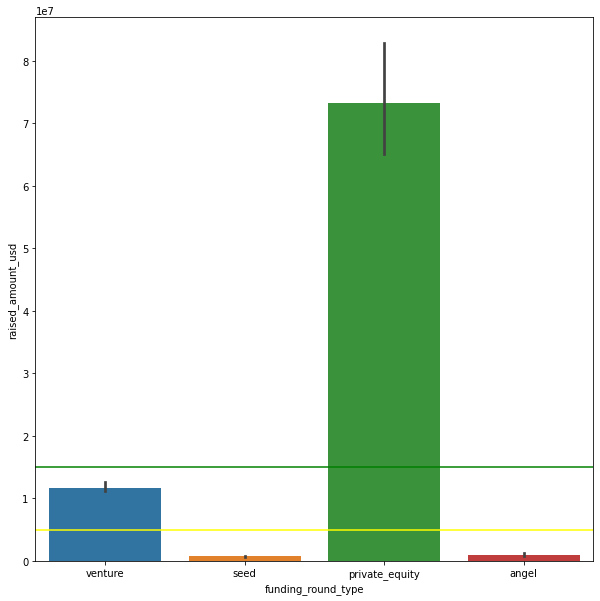

In [68]:
plt.figure(figsize=(10,10))
sns.barplot(x='funding_round_type',y='raised_amount_usd',data=mf)
plt.axhline(5000000,color='yellow') #Lower limit of investment
plt.axhline(15000000,color='green') #upper limit of the investment

In [69]:
#limiting the dataset to top 9 countries:
mf.groupby("country_code")['raised_amount_usd'].sum().sort_values(ascending=False).head(9)

country_code
USA    5.112685e+11
CHN    6.149742e+10
GBR    2.716755e+10
IND    2.133162e+10
CAN    1.327111e+10
DEU    8.627355e+09
ISR    8.156387e+09
FRA    8.114600e+09
NLD    5.094012e+09
Name: raised_amount_usd, dtype: float64

In [70]:
#List of top 9 countries from above list
listOfTop9Countries=['USA','CHN','GBR','IND','CAN','DEU','ISR','FRA','NLD']
mfTop9=mf[(mf['country_code'].isin(listOfTop9Countries))]

A plot showing the top 9 countries against the total amount of investments of funding type FT. This should make the top 3 countries (Country 1, Country 2, and Country 3) very clear. 

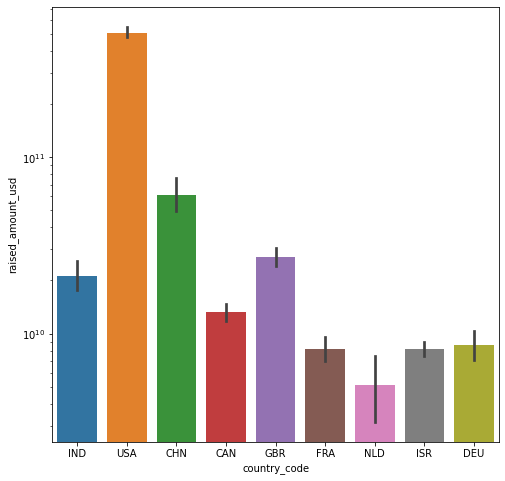

In [71]:
plt.figure(figsize=(8,8))
graph=sns.barplot(x='country_code',y='raised_amount_usd',data=mfTop9,estimator=np.sum)
#Taking log to subdivide the Y axis, as the difference is now clearly visible.
graph.set_yscale('log')
plt.show()

Last plot:
A plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart (for the chosen investment type FT). This plot should clearly display the top 3 sectors each in Country 1, Country 2, and Country 3.

In [72]:
#Taking top sectors from USA, and confirming the number of rows added.
listOfD1Sectors=['Others','Cleantech / Semiconductors','Social, Finance, Analytics, Advertising']
finalMaster=D1[D1['main_sector'].isin(listOfD1Sectors)]
finalMaster.shape

(7132, 19)

In [73]:
#Taking top sectors of GBR, and confirming the number of rows added.
listOfD2Sectors=['Others','Cleantech / Semiconductors','Social, Finance, Analytics, Advertising']
finalMaster=finalMaster.append(D2[D2['main_sector'].isin(listOfD2Sectors)])

In [74]:
finalMaster.shape

(7500, 19)

In [75]:
#Taking top sectors of IND, and confirming the number of rows added.
listOfD3Sectors=['Others','News, Search and Messaging','Entertainment']
finalMaster=finalMaster.append(D3[D3['main_sector'].isin(listOfD3Sectors)])
finalMaster.shape

(7694, 19)

<AxesSubplot:xlabel='country_code', ylabel='raised_amount_usd'>

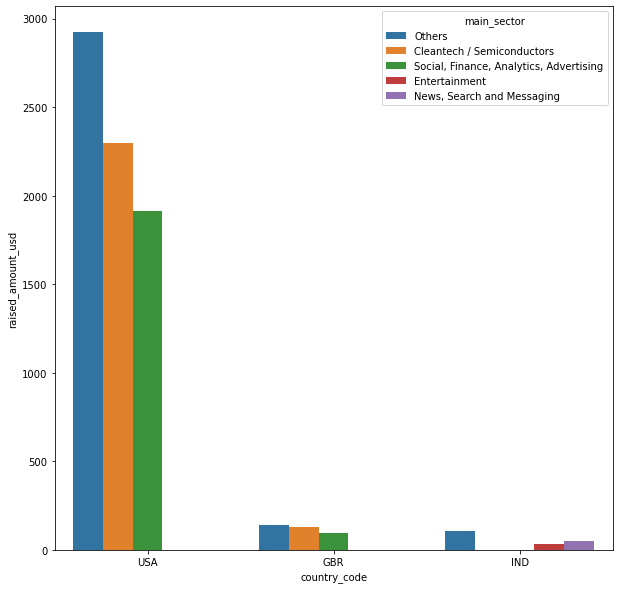

In [76]:
plt.figure(figsize=(10,10))
sns.barplot(x='country_code',y='raised_amount_usd',hue="main_sector",data=finalMaster,estimator=lambda x:len(x))